In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mayavi import mlab
from scipy import sparse
mlab.init_notebook()
print('ok')

Notebook initialized with ipy backend.
ok


In [6]:
from data_loader.data_loaders import Bin_energy_data
from os import path
from data_loader.EcalDataIO import ecalmatio, energymatio

edep_suffix = r'.edeplist.mat'
en_suffix = r'.energy.mat'

data_folder = r"C:\Users\dor00\PycharmProjects\LUXE-project-master\data\raw"
data_instance = r"signal.al.elaser.IP05"
full_instance = path.join(data_folder, data_instance)

edep_path = full_instance + edep_suffix
en_path = full_instance + en_suffix

dataset = Bin_energy_data(edep_path, en_path)
energy_sparse = energymatio(en_path)

(array([84., 87., 65., 75., 50., 48., 45., 31., 24., 15., 27., 28., 17.,
        15., 20., 22., 16.,  9.,  8.,  9., 15., 13., 15.,  8.,  9.,  8.,
         7.,  1.,  7.,  2.,  2.,  5.,  6.,  1.,  6.,  5.,  4.,  1.,  3.,
         5.,  2.,  4.,  2.,  3.,  2.,  1.,  2.,  2.,  0.,  1.,  1.,  1.,
         1.,  3.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  2.,  2.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,
         0.,  2.,  0.,  1.,  0.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

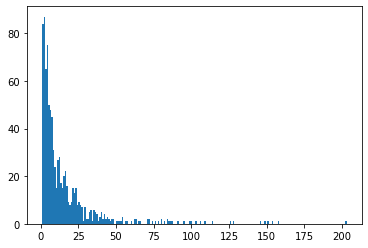

In [7]:
len_list = [len(v) for k, v in energy_sparse.items()]
uniq, counts = np.unique(len_list, return_counts=True)
plt.hist(len_list, bins=max(uniq))

In [8]:
event_id = '818'
ecal_event, energy_event = dataset.en_dep[event_id], dataset.energies[event_id]
print(len(energy_event))

In [13]:
coords = list(ecal_event.keys())

axis_list = list()
for ind in [1, 2, 0]:
    cur_key = lambda _: _[ind]
    min_val = min(coords, key=cur_key)[ind]
    max_val = max(coords, key=cur_key)[ind]
    axis = np.arange(min_val, max_val + 1)
    axis_list.append(axis)

X, Y, Z = np.meshgrid(*axis_list)
ecal_matrix = np.full((21, 100, 11), fill_value=0, dtype=np.float64)

for k, v in ecal_event.items():
    z, x, y = k
    ecal_matrix[z, x, y] = v

Text(0.5, 1.0, 'Z=0')

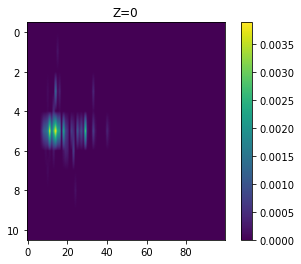

In [15]:
entry = ecal_matrix[0, :, :]
plt.imshow(entry.T, aspect=10, interpolation='bilinear')
plt.colorbar()
plt.title('Z=0')

Text(0.5, 1.0, 'Sum on yz vs x')

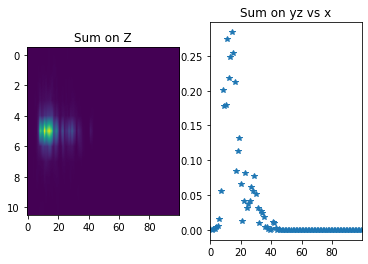

In [40]:
fix, axs = plt.subplots(1, 2, 'all')

entry = np.sum(ecal_matrix, axis=0)
axs[0].imshow(entry.T, aspect=10, interpolation='bilinear')
axs[0].set_title('Sum on Z')

sum_vs_z = ecal_matrix.sum(axis=2).sum(axis=0)
axs[1].plot(sum_vs_z, '*')
axs[1].set_title('Sum on yz vs x')

Text(0.5, 1.0, 'Sum on xy vs z')

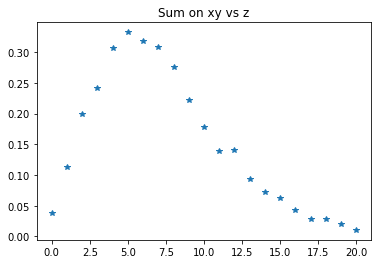

In [18]:
sum_vs_z = ecal_matrix.sum(axis=2).sum(axis=1)
plt.plot(sum_vs_z, '*')
plt.title('Sum on xy vs z')

Text(0.5, 1.0, 'Sum on yz vs x')

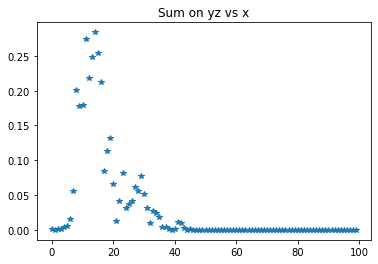

In [21]:
sum_vs_z = ecal_matrix.sum(axis=2).sum(axis=0)
plt.plot(sum_vs_z, '*')
plt.title('Sum on yz vs x')